#### Formula 1 - Exploratory data analysis

Importing the necessary packages and modules

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Changing the file path and importing the dataset

In [27]:
import os
os.chdir('E:\\Datasets\\F1')
path = os.getcwd()
files = {i[0]:i[1] for i in enumerate(os.listdir())}
files

{0: 'circuits.csv',
 1: 'constructorResults.csv',
 2: 'constructors.csv',
 3: 'constructorStandings.csv',
 4: 'drivers.csv',
 5: 'driverStandings.csv',
 6: 'lapTimes.csv',
 7: 'pitStops.csv',
 8: 'qualifying.csv',
 9: 'races.csv',
 10: 'results.csv',
 11: 'seasons.csv',
 12: 'status.csv'}

In [32]:
full_path = os.path.join(path,files[9]) # gettug the races.csv file from the dictionary

In [34]:
races = pd.read_csv(full_path,delimiter=',',encoding='latin1',header=0)

In [36]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [37]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
raceId       997 non-null int64
year         997 non-null int64
round        997 non-null int64
circuitId    997 non-null int64
name         997 non-null object
date         997 non-null object
time         266 non-null object
url          997 non-null object
dtypes: int64(4), object(4)
memory usage: 62.4+ KB


In [43]:
races[races['time'].isna() == True][:5]

,raceId,year,round,circuitId,name,date,time,url
89,90,2004,1,1,Australian Grand Prix,2004-03-07,NaN,http://en.wikipedia.org/wiki/2004_Australian_G...
90,91,2004,2,2,Malaysian Grand Prix,2004-03-21,NaN,http://en.wikipedia.org/wiki/2004_Malaysian_Gr...
91,92,2004,3,3,Bahrain Grand Prix,2004-04-04,NaN,http://en.wikipedia.org/wiki/2004_Bahrain_Gran...
92,93,2004,4,21,San Marino Grand Prix,2004-04-25,NaN,http://en.wikipedia.org/wiki/2004_San_Marino_G...
93,94,2004,5,4,Spanish Grand Prix,2004-05-09,NaN,http://en.wikipedia.org/wiki/2004_Spanish_Gran...


In [59]:
races.sort_values(by=['year','date'],ascending=False)

,raceId,year,round,circuitId,name,date,time,url
996,1009,2018,21,24,Abu Dhabi Grand Prix,2018-11-25,13:00:00,http://en.wikipedia.org/wiki/2018_Abu_Dhabi_Gr...
995,1008,2018,20,18,Brazilian Grand Prix,2018-11-11,16:00:00,http://en.wikipedia.org/wiki/2018_Brazilian_Gr...
994,1007,2018,19,32,Mexican Grand Prix,2018-10-28,19:00:00,http://en.wikipedia.org/wiki/2018_Mexican_Gran...
993,1006,2018,18,69,United States Grand Prix,2018-10-21,19:00:00,http://en.wikipedia.org/wiki/2018_United_State...
992,1005,2018,17,22,Japanese Grand Prix,2018-10-07,05:00:00,http://en.wikipedia.org/wiki/2018_Japanese_Gra...
991,1004,2018,16,71,Russian Grand Prix,2018-09-30,12:00:00,http://en.wikipedia.org/wiki/2018_Russian_Gran...
990,1003,2018,15,15,Singapore Grand Prix,2018-09-16,12:00:00,http://en.wikipedia.org/wiki/2018_Singapore_Gr...
989,1002,2018,14,14,Italian Grand Prix,2018-09-02,12:00:00,http://en.wikipedia.org/wiki/2018_Italian_Gran...
988,1001,2018,13,13,Belgian Grand Prix,2018-08-26,12:00:00,http://en.wikipedia.org/wiki/2018_Belgian_Gran...
987,1000,2018,12,11,Hungarian Grand Prix,2018-07-29,12:00:00,http://en.wikipedia.org/wiki/2018_Hungarian_Gr...


In [67]:
races.drop(columns=['time','url'],inplace=True)

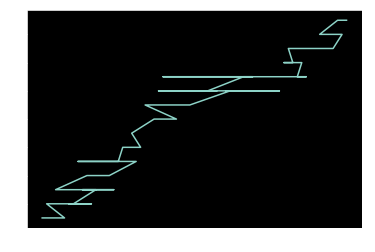

In [71]:
races['year'].value_counts()
plt.plot(races['year'].value_counts())
plt.show()

In [78]:
races['name'].unique()

array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'European Grand Prix',
       'Belgian Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Brazilian Grand Prix',
       'Abu Dhabi Grand Prix', 'Canadian Grand Prix', 'French Grand Prix',
       'United States Grand Prix', 'San Marino Grand Prix',
       'Austrian Grand Prix', 'Argentine Grand Prix',
       'Luxembourg Grand Prix', 'Portuguese Grand Prix',
       'Pacific Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Korean Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Dallas Grand Prix',
       'United States Grand Prix West', 'Swiss Grand Prix',
       'Caesars Palace Grand Prix', 'Swedish Grand Prix',
       'Indianapolis 500', 'Moroccan Grand Prix', 'Pes

997